In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [5]:
path ='../../../Data_preprocessing//RNA post_autoencoder+Clinic joined/Clinical_data_and_RNA_total_Features_PFS.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.490411,1.374775,...,0.979436,0.927694,0.847157,0.927951,0.954266,0.702499,0.924324,0.947513,0.977068,0.974450
1,1,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,62.0,0.0,0.0,3.0,707.0,0.0,1.249315,1.374775,...,0.942790,0.904091,0.916965,0.984643,0.951518,0.702499,0.985716,0.926652,0.977485,0.952089
2,2,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.654795,1.374775,...,0.899643,0.895334,0.962866,0.971061,0.941744,0.891154,0.966061,0.927933,0.938855,0.929364
3,3,G138701_RCCBMS-00116-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,1.216438,1.374775,...,0.930375,0.920000,0.906820,0.965345,0.989037,0.890711,0.953759,0.925267,0.984474,0.978449
4,4,G138701_RCCBMS-00136-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,2.860274,1.374775,...,0.909491,0.933381,0.970506,0.962001,0.965852,0.690264,0.961500,0.933123,0.962010,0.945552


In [6]:
X = data[['MSKCC_FAVORABLE', 'MSKCC_INTERMEDIATE', 'MSKCC_NA', 'MSKCC_POOR','AC005307.1', 'ATP5G2P1', 'DLGAP4', 'EIF4A1P9', 'FAM172BP', 'FAM224A', 'GJA9', 'GPR155', 'GYPE', 'IL25', 'KLHL5', 'LANCL1-AS1', 'LEMD1', 'PCMT1', 'RP11-120J4.1', 'RP11-20G6.3', 'RP11-349G13.2', 'RP11-374M1.2', 'RP11-536C10.21', 'RP11-95G17.2', 'RP11-96O20.4', 'RP5-827C21.1', 'RPS12P26', 'SDR42E1', 'SNORD113-5', 'TARBP2', 'TRAV41', 'TRIM43B', 'VN2R17P', 'XPC']]
Y=[]
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)

In [7]:
X

,MSKCC_FAVORABLE,MSKCC_INTERMEDIATE,MSKCC_NA,MSKCC_POOR,AC005307.1,ATP5G2P1,DLGAP4,EIF4A1P9,FAM172BP,FAM224A,...,RP11-96O20.4,RP5-827C21.1,RPS12P26,SDR42E1,SNORD113-5,TARBP2,TRAV41,TRIM43B,VN2R17P,XPC
0,1,0,0,0,0.898634,0.673138,0.909389,0.758691,0.716166,0.858590,...,0.682591,0.640214,0.842022,1.000000,0.625993,0.912529,0.971557,0.587310,0.863040,0.974497
1,1,0,0,0,0.898634,0.673138,0.909006,0.758691,0.716166,0.858590,...,0.682591,0.713747,0.726861,0.694015,0.625993,0.903036,0.666040,0.587310,0.863040,0.958581
2,0,1,0,0,0.898634,0.673138,0.969120,0.954047,0.716166,0.858590,...,0.682591,0.763067,0.747376,0.869025,0.625993,0.898032,0.888588,0.587310,0.863040,0.980335
3,0,0,0,1,0.894698,0.654761,0.936171,0.877898,0.865741,0.851019,...,0.669220,0.481977,0.797865,0.931136,0.624581,0.873870,0.826337,0.564337,0.855268,0.945490
4,0,1,0,0,0.896845,0.663879,0.958324,0.746849,0.702019,0.853550,...,0.677685,0.745493,0.772651,0.902087,0.613038,0.896762,0.767579,0.552830,0.857563,0.948794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0,0,1,0,0.893909,0.683394,0.946660,0.772952,0.903675,0.852969,...,0.677348,0.695150,0.731990,0.890699,0.625957,0.871203,0.735707,0.598319,0.856523,0.957321
140,0,0,1,0,0.898634,0.673138,0.943755,0.758691,0.716166,0.858590,...,0.682591,0.640214,0.827549,0.694015,0.625993,0.919896,0.666040,0.587310,0.863040,0.961345
141,0,0,1,0,0.896845,0.663879,0.921780,0.746849,0.702019,0.853550,...,0.677685,0.588289,0.662193,0.620207,0.613038,0.889800,0.643739,0.552830,0.857563,0.925059
142,0,0,1,0,0.896845,0.874054,0.958130,0.839283,0.702019,0.853550,...,0.677685,0.783232,0.775241,0.938378,0.613038,0.939528,0.764141,0.736171,0.857563,0.953315


In [8]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=125)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 115
Target column size of the training set: 115
Test set size: 29
Target column size of the test set: 29


In [9]:
param_grid = {'max_iter': [200, 500, 1000],
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'random_state': [125],
            'max_fun': [300, 500,1000, 5000, 10000, 15000, 20000],
            'hidden_layer_sizes': [3,5],
            'solver': ['lbfgs']}

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(MLPClassifier(), param_grid, cv =5)

clf.fit(XTrain , yTrain)


c:\Users\sandr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\sandr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\sandr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [3, 5],
                         'max_fun': [300, 500, 1000, 5000, 10000, 15000, 20000],
                         'max_iter': [200, 500, 1000], 'random_state': [125],
                         'solver': ['lbfgs']})

In [10]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


c:\Users\sandr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=3, max_fun=500,
              max_iter=500, random_state=125, solver='lbfgs')

In [11]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5478260869565217


In [12]:
import shap
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
import ssl

# Compute SHAP values

In [13]:
explainer = shap.KernelExplainer(model.predict_proba, XTrain)
shap_values = explainer.shap_values(XTest)

Using 115 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 29/29 [00:25<00:00,  1.13it/s]


# SHAP Global Interpretation

The summary plot shows the most important features and the magnitude of their impact on the model. It is the global interpretation.

Medimos la importancia de una característica calculando el aumento en el error de predicción del modelo después de permutar la característica. Una característica es “importante” si cambiar sus valores aumenta el error del modelo, porque en este caso el modelo se basó en la característica para la predicción. Una característica es “no importante” si cambiar sus valores deja el error del modelo sin cambios, porque en este caso el modelo ignoró la característica para la predicción.

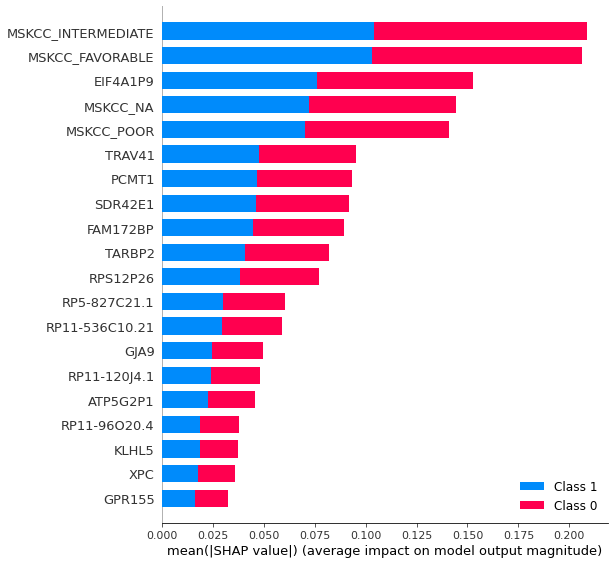

In [14]:
shap.summary_plot(shap_values, plot_type = 'bar', feature_names = XTest.columns)
#shap_values[0] = NR, shap_values[1]=SR, shap_values[2]=R

Importancia de la característica SHAP medida como los valores medios absolutos de Shapley. TRAV41 fue la característica más importante, cambiando la probabilidad absoluta pronosticada de cáncer en un promedio de 0.9 puntos porcentuales (0.09 en x -axis).

# SHAP Local Interpretation
The force plot is good to see where the “output value” fits in relation to the “base value”. We also see which features have a positive (red) or negative (blue) impact on the prediction and the magnitude of the impact.

1. Force plot

In [15]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[0][0], features = XTest.columns)

2. Decision plot

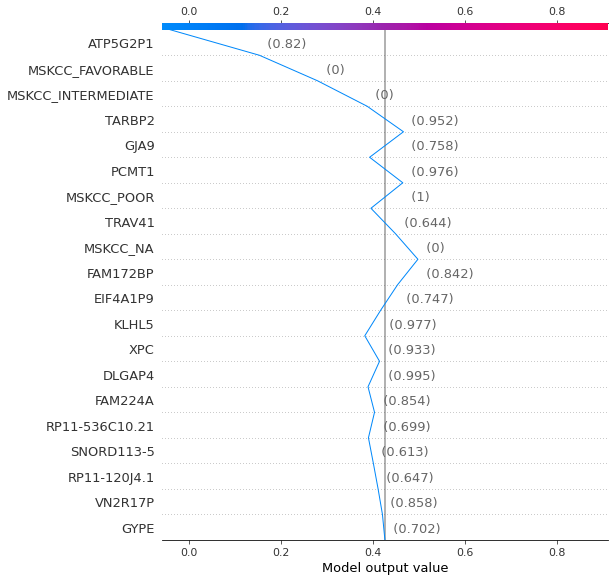

In [16]:
shap.decision_plot(explainer.expected_value[1], shap_values[0][0], features = XTest, feature_names = XTest.columns.tolist())

3. Waterfall plot

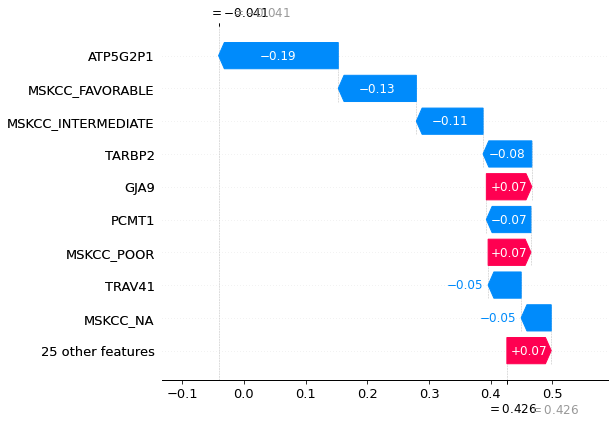

In [17]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[1], shap_values[0][0], feature_names = XTest.columns)

In [18]:
shap.force_plot(explainer.expected_value[1], shap_values[0], XTest)

Los valores rojos aumentan la predicción los azules la disminuyen.